<a href="https://www.kaggle.com/code/bhanupratapbiswas/sales-prediction-using-python?scriptVersionId=139602689" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<center><img src="https://www.embedded-robotics.com/wp-content/uploads/2022/04/Forecast-Sales-using-Machine-Learning-1024x683.jpeg" wedth="100%" ></center>
<div style="padding: 25px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://img.freepik.com/free-photo/abstract-grunge-decorative-relief-navy-blue-stucco-wall-texture-wide-angle-rough-colored-background_1258-28311.jpg?w=2000)"><b><span style='color:white; font-size:45px;'>SALES PREDICTION USING PYTHON</span></b> </div>
<p Style="color:blue; font-size:25px; border: 5px solid blue">Sales prediction using Python can be accomplished through various machine learning techniques. Here, I'll outline a basic approach using linear regression as an example. Keep in mind that more advanced techniques might provide better results, depending on your data and specific requirements.</p>

<h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Import Libraries</h1>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/data-visualizatiion/insurance.csv
/kaggle/input/advertising-dataset/advertising.csv


In [2]:
insurance = pd.read_csv('/kaggle/input/data-visualizatiion/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<h1 style="border:3px solid blue; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:blue;font-weight:bold; font-size:45px;">Data Exploration</h1>

In [3]:
insurance.shape

(1338, 7)

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
print(insurance['sex'].unique())
print(insurance['smoker'].unique())
print(insurance['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [6]:
insurance['sex'].replace(['male','female'],[0,1],inplace= True)
insurance['smoker'].replace(['yes','no'],[1,0],inplace= True)
insurance['region'].replace(['southwest','southeast','northwest','northeast'],[0,1,2,3],inplace= True)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [7]:
insurance.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


<h1 style="border:3px solid blue; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:blue;font-weight:bold; font-size:45px;">Data Cleaning</h1>

In [8]:
# Checking Null values
insurance.isnull().sum()*100/insurance.shape[0]
# There are no NULL values in the dataset, hence it is clean.

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

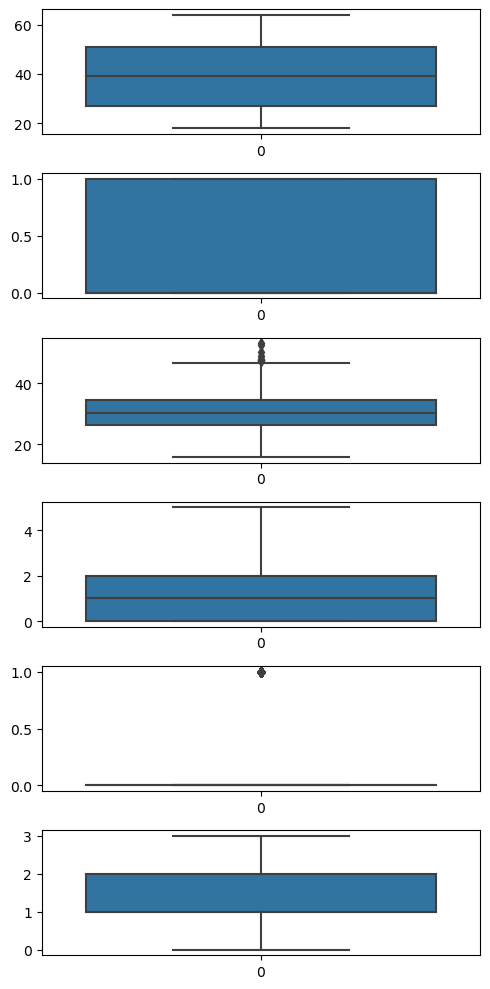

In [9]:
# Outlier Analysis
fig, axs = plt.subplots(6, figsize = (5,10))
plt1 = sns.boxplot(insurance['age'], ax = axs[0])
plt2 = sns.boxplot(insurance['sex'], ax = axs[1])
plt3 = sns.boxplot(insurance['bmi'], ax = axs[2])
plt4 = sns.boxplot(insurance['children'], ax = axs[3])
plt5 = sns.boxplot(insurance['smoker'], ax = axs[4])
plt6 = sns.boxplot(insurance['region'], ax = axs[5])
plt.tight_layout()

<h1 style="border:3px solid blue; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:blue;font-weight:bold; font-size:45px;">Exploratory Data Analysis</h1>
Sales (Target Variable)

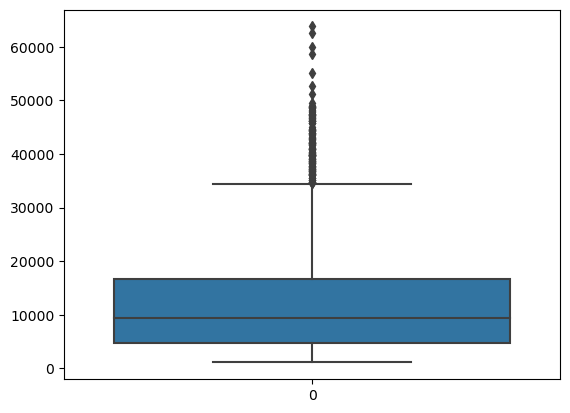

In [10]:
sns.boxplot(insurance['charges'])
plt.show()

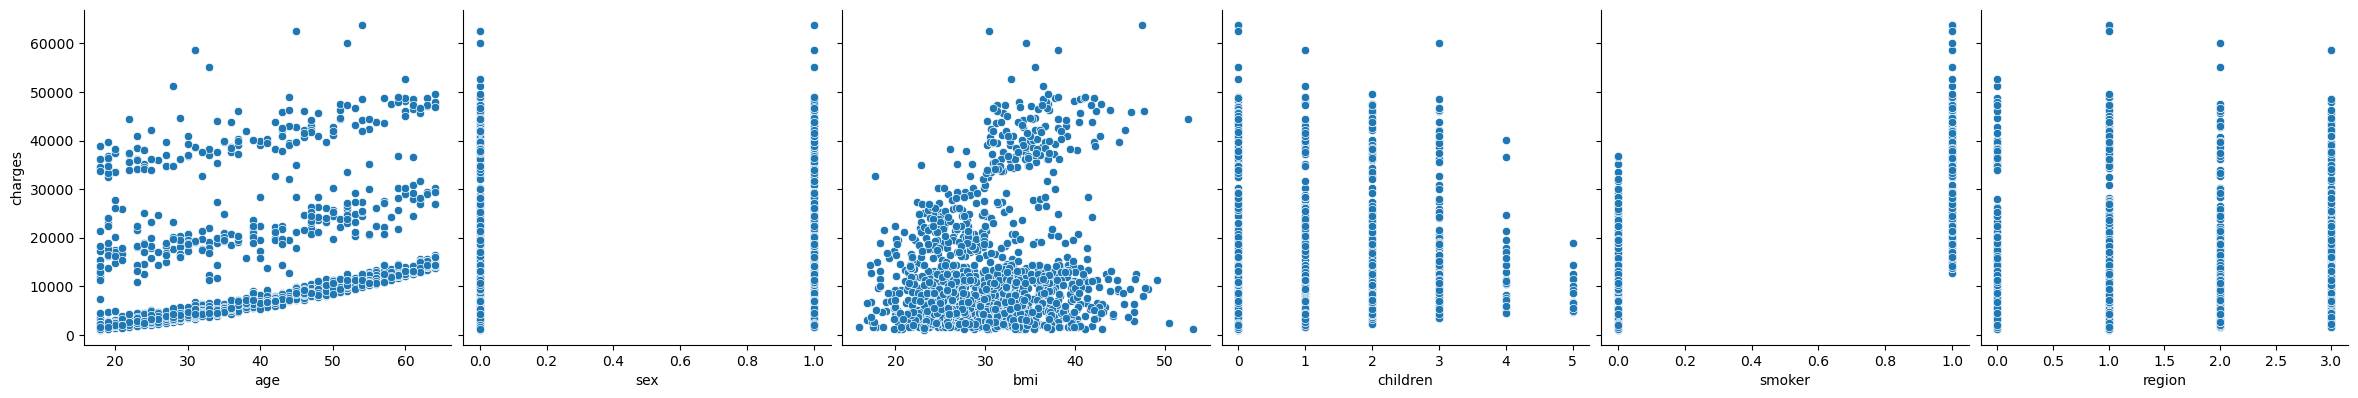

In [11]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(insurance, x_vars=['age', 'sex', 'bmi','children','smoker','region'], y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

In [12]:
insurance.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


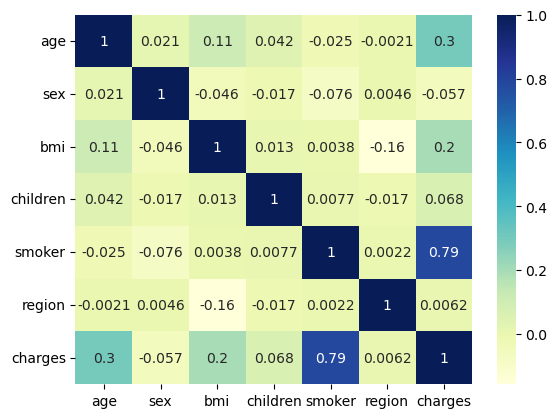

In [13]:
# Let's see the correlation between different variables.
sns.heatmap(insurance.corr(), cmap="YlGnBu", annot = True)
plt.show()

<h3>As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable</h3>

<h1 style="border:3px solid blue; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:blue;font-weight:bold; font-size:45px;">Model Building</h1>
<h3 style = "color:red;">Performing Simple Linear Regression</h3>
<ul style = "color:blue; font-size:20px;">
    <li>Equation of linear regression</li>

<li>y=c+m1x1+m2x2+...+mnxn</li>

<li>y is the response</li>

<li>c is the intercept</li>

<li>m1 is the coefficient for the first feature</li>

<li>mn is the coefficient for the nth feature</li>

<li>In our case:</li>

<li>y=c+m1×TV</li>

<li>The m values are called the model coefficients or model parameters</li>
</ul>
<h2 style = "color:red;">Assigning Features & Labels </h2>

# Using 1 Variable

In [14]:
X = insurance.iloc[:, :1]
y = insurance.iloc[:, -1]

<h2 style = "color:red;">Train-Test Split<h2>
    <p style = "color:blue; font-size:20px;"> You now need to split our variable into training and testing sets. You'll perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset</p>

In [15]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [16]:
X_train.head()

,age
966,51
522,51
155,44
671,29
1173,38


In [17]:
y_train.head()

966     23967.38305
522      9866.30485
155      6948.70080
671      3943.59540
1173     6457.84340
Name: charges, dtype: float64

In [18]:
X_test.head()

,age
12,23
306,28
318,44
815,20
157,18


In [19]:
y_test.head()


12      1826.84300
306    20177.67113
318     7421.19455
815     1877.92940
157    15518.18025
Name: charges, dtype: float64

<h2 style = "color:red;">Building a Linear Model<h2>
<h4>Import Linear Regression Model and create an object</h4>

In [20]:
lreg = LinearRegression()

<h2 style = "color:red;">Fitting the model<h2>

In [21]:
lreg.fit(X_train, y_train)

LinearRegression()

<h2 style = "color:red;">Making Prediction<h2>

In [22]:
predict_train = lreg.predict(X_train)
predict_test = lreg.predict(X_test)

<h2 style = "color:red;">Checking Our Model<h2>

In [23]:
lreg.coef_

array([267.74014088])

In [24]:
lreg.intercept_

2707.051837092662

In [25]:
#MSE for training set
mean_squared_error(y_train, predict_train)

132892358.42251574

In [26]:
#MSE for testing set
mean_squared_error(y_test, predict_test)

134798778.0695984

In [27]:
#r squared for training set
r2_score(y_train, predict_train)

0.09650123594677995

In [28]:
#r squared for training set
r2_score(y_test, predict_test)

0.07161898944046363

<h3>R**2 is basically how perfectly your line is fit</h3>

0 is worst fit
1 is good fit

<h2 style = "color:red;">Visualizing Our Line<h2>

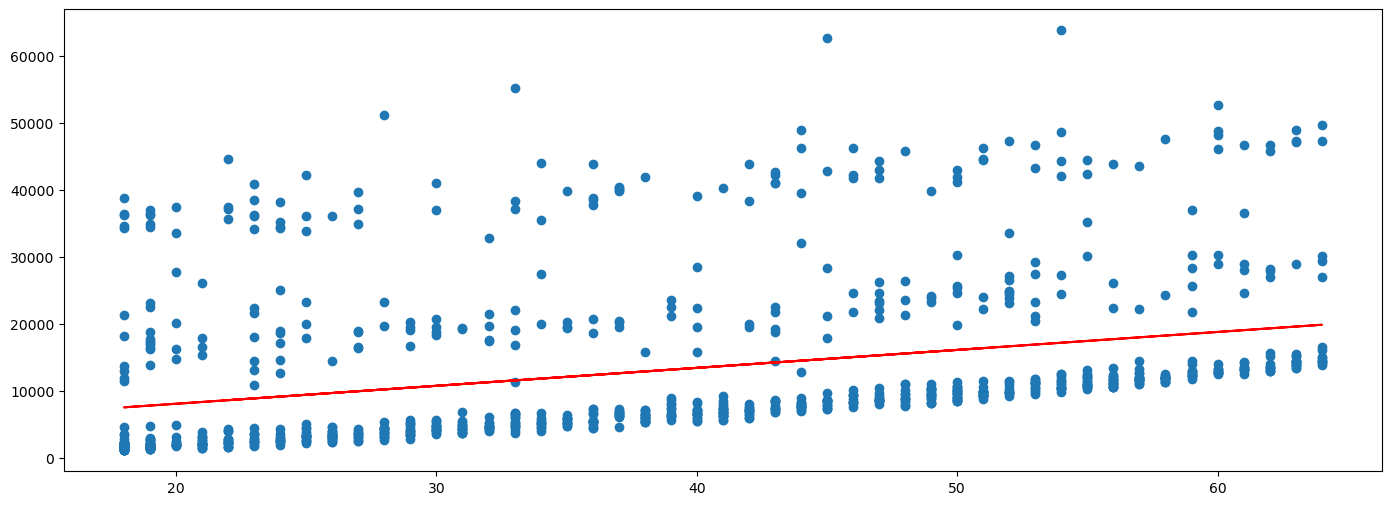

In [29]:
plt.figure(figsize=(17,6))
plt.scatter(X_train, y_train)
plt.plot(X_train, predict_train, 'r')
plt.show()

# Using 2 Variables

In [30]:
X = insurance.iloc[:, :2]
y = insurance.iloc[:, -1]

In [31]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
X_train.head()

,age,sex
966,51,0
522,51,1
155,44,0
671,29,1
1173,38,0


In [33]:
y_train.head()

966     23967.38305
522      9866.30485
155      6948.70080
671      3943.59540
1173     6457.84340
Name: charges, dtype: float64

In [34]:
X_test.head()

,age,sex
12,23,0
306,28,1
318,44,1
815,20,1
157,18,0


In [35]:
y_test.head()

12      1826.84300
306    20177.67113
318     7421.19455
815     1877.92940
157    15518.18025
Name: charges, dtype: float64

<h2 style = "color:red;">Fitting the model<h2

In [36]:
lreg.fit(X_train, y_train)

LinearRegression()

<h2 style = "color:red;">Making Prediction<h2>

In [37]:
predict_train = lreg.predict(X_train)
predict_test = lreg.predict(X_test)

<h2 style = "color:red;">Checking Our Model

In [38]:
lreg.coef_

array([  267.43987976, -1368.90870153])

<h3>The coefficients of TV & radio are as above i.e m1, m2</h3>

In [39]:
lreg.intercept_

3406.164166372333

In [40]:
#MSE for training set
mean_squared_error(y_train, predict_train)

132423907.07154632

In [41]:
#MSE for testing set
mean_squared_error(y_test, predict_test)

133923932.6667891

In [42]:
#r squared for training set
r2_score(y_train, predict_train)

0.09968610843790005

In [43]:
#r squared for training set
r2_score(y_test, predict_test)

0.07764419138052969

<h1 style="border:3px solid blue; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:blue;font-weight:bold; font-size:45px;">🥰Thank you🥰</h1>